# Stepwise Data Fitting

This is an attempt to incrementally analyze the model as we complicate it slowly by adding new dynamics (except for identity which has been left out here). 


## Models and Simulations
Every simulation run has 1000 agents that represent humans, and the richest model has 10 media agents as well as a variable media influence factor. For each of these steps, every parameter combination is run with 30 random initializations, except for the richest model (Step 4) which has been run with 5 random initializations.

The following models were tried:

1. Simple Hegselmann-Krause with full network.
2. Simple Hegselmann-Krause with scale-free network.
3. Hegselmann-Krause with normally distributed open-mindedness and scale-free network.
3. Hegselmann-Krause with normally distributed open-mindedness, normally distributed initial opinion, and scale-free network.
5. Hegselmann-Krause with normally distributed open-mindedness, normally distributed initial opinion, media agents ($MedN = 10$), variable media distribution parameters, variable media influence factor, and scale-free network.

**Notes:** 
1. The media influence factor  $MedInf \epsilon [0, 1]$ and is a weighting factor for media-sourced influence. 
So $MedInf = 0$ implies no influence from media sources, while $MedInf = 1$ implies that media-sourced influence is as strong as other people's opinions.
2. The scale-free network parameter is set to 1.
3. For Step 4, initial opinion distribution parameters were fixed to values of $\mu_{InitialPopOp} = 0$ and $\sigma_{InitialPopOp} = 0.8$ after pilot simulations showed significantly good fits for these values.
4. Media opinion positions are drawn from a deterministic set of positions approximating the normal pdf, and have the parameters $\mu_{MediaOp}$ and $\sigma_{MediaOp}$.

| Model    | Parameters |
| -------- | ------- |
| Step 1  | $\varepsilon$ |
| Step 2  | $\varepsilon$ |
| Step 3  | $\mu_{\varepsilon}$, $\sigma_{\varepsilon}$|
| Step 4  | $\mu_{\varepsilon}$, $\sigma_{\varepsilon}$, $\sigma_{InitialOp}$|
| Step 5  | $\mu_{\varepsilon}$, $\sigma_{\varepsilon}$,  $\mu_{MediaOp}$, $\sigma_{MediaOp}$, $MedInf$|

## Survey Data

<>

### Parlemeter Data - Initial fitting patterns

<>

### Dynamic Data - 

<>

## Fitting Strategy

<>




# Preprocessing and Saving Simulation Data

## Globals (SET EACH TIME)

In [1]:
current_runs_title = "15.09.25"

# Set below to True if rerunning after saving appropriately in //data//preprocessed//<current_runs_title>
load_preprocessed_data = True

# Set below to True if there is a need to preprocess data (such as while running for the first time for new data)
preprocess_data = True

# Set below to True if running for the first time or need to preprocess and save for some other reason
save_preprocessed_data = True


# set a smaller processing unit if it benefits you, else keep it to range(1, 5)
steps_to_process =  range(1, 6)

# For the folder names for each step
step_input_folder_name = []
step_output_folder_name = []

# Specific sub-folder names (folder name within data/cluster/endsim)
step_input_folder_name.append("Step1") 
step_input_folder_name.append("Step2") 
step_input_folder_name.append("Step3") 
step_input_folder_name.append("Step4_5reps") 
step_input_folder_name.append("Step5_singleRep") 

step_output_folder_name = step_input_folder_name

step_titles = ["Simple HK with Full Network", "Simple HK with Scale-Free Network", "Heterogenous Openness", "Heterogenous Openness with normal opinion distributions", "Media and Influence"]

In [2]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
import seaborn as sns
from scipy.spatial.distance import jensenshannon

## Paths

In [3]:
# Where the preprocessed data will be saved
full_preprocessed_data_folder_path = os.path.join("data\\preprocessed\\" + current_runs_title)


# Wheer the output plots will be saved
plots_folder_path =  os.path.join("analysis\\plots\\" + current_runs_title)

## Issue - Step 4 has a LOT OF redundancies and no media

I accidentally ran this step with 0 media agents, so we have a great number of repeat simulations and no media in this step.
We will rectify this by adding a step 5 with media and rerunning the simulations with the new setting.

However, for the time being we need to remove the extra simulations.

In [4]:

# # Define the regex pattern to extract parameters
# pattern = r"EndSim_epsM(-?[\d\.]+)_epsSD(-?[\d\.]+)___OpD([a-zA-Z-]+)_OpM(-?[\d\.]+)_OpSD(-?[\d\.]+)___Net([a-zA-Z-]+)___NAgents(\d+)___RS(\d+)__MedInfF([\d\.]+)___MedD([a-zA-Z-]+)_MedN(\d+)_MedM(-?[\d\.]+)_MedSD(-?[\d\.]+)"

# def extract_eps_params(filename):
#     """Extract epsM and epsSD parameters from filename"""
#     base_name = os.path.splitext(filename)[0]
#     match = re.search(pattern, base_name)
#     if match:
#         epsM = float(match.group(1))
#         epsSD = float(match.group(2))
#         RS = int(match.group(8))
#         return (epsM, epsSD, RS)
#     return None
    
# # Alternative: Move files instead of deleting (safer approach)
# def move_redundant_files(directory, backup_dir="redundant_backup"):
#     """Move redundant files to a backup directory instead of deleting"""
#     # Create backup directory if it doesn't exist
#     backup_path = os.path.join(directory, backup_dir)
#     os.makedirs(backup_path, exist_ok=True)
    
#     # Get all CSV files
#     csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]
    
#     unique_combinations = {}
#     files_to_keep = []
#     files_to_move = []
    
#     # Process each file
#     for filename in csv_files:
#         params = extract_eps_params(filename)
#         if params:
#             epsM, epsSD, RS = params
#             combination = (epsM, epsSD, RS)
            
#             if combination not in unique_combinations:
#                 unique_combinations[combination] = filename
#                 files_to_keep.append(filename)
#             else:
#                 files_to_move.append(filename)
#         else:
#             print(f"Warning: Could not parse parameters from {filename}")
    
#     # Move redundant files
#     moved_count = 0
#     for filename in files_to_move:
#         src_path = os.path.join(directory, filename)
#         dest_path = os.path.join(backup_path, filename)
#         try:
#             os.rename(src_path, dest_path)
#             moved_count += 1
#             # print(f"Moved to backup: {filename}")
#         except Exception as e:
#             print(f"Error moving {filename}: {e}")
    
#     # Print summary
#     print(f"\nSummary:")
#     print(f"Total files processed: {len(csv_files)}")
#     print(f"Unique (epsM, epsSD, RS) combinations: {len(unique_combinations)}")
#     print(f"Files kept: {len(files_to_keep)}")
#     print(f"Files moved to backup: {moved_count}")
    
#     return files_to_keep, files_to_move


# move_redundant_files("data/cluster/endsim/step4_5reps")

##  Reading and Preprocessing Simulation Data

In [5]:
# Regex pattern for all files
pattern = r"EndSim_epsM(-?[\d\.]+)_epsSD(-?[\d\.]+)___OpD([a-zA-Z-])+_OpM(-?[\d\.]+)_OpSD(-?[\d\.]+)___Net([a-zA-Z-]+)___NAgents(\d+)___RS(\d+)__MedInfF([\d\.]+)___MedD([a-zA-Z-])+_MedN(\d+)_MedM(-?[\d\.]+)_MedSD(-?[\d\.]+)"

def parse_filename(filename):
    """Extract parameters from filename using regex"""
    # Remove .csv extension before parsing
    base_name = os.path.splitext(filename)[0]
    match = re.search(pattern, base_name)
    
    if match:
        return {
            'epsM': float(match.group(1)),
            'epsSD': float(match.group(2)),
            'OpD': (match.group(3)),
            'OpM': float(match.group(4)),
            'OpSD': float(match.group(5)),
            'NetworkType': (match.group(6)),
            'NAgents': int(match.group(7)),  # Convert to integer
            'RandomSeed': int(match.group(8)),  # Convert to integer
            'MedInfF': float(match.group(9)),  # New Influence Factor parameter
            'MedD': (match.group(10)),  # Media Distribution
            'MedN': int(match.group(11)),      # Convert to integer
            'MedM': float(match.group(12)),
            'MedSD': float(match.group(13))
        }
    return None
    
def extract_opinion_sections(content):
    """Extract media and individual opinion sections from file content"""
    # Split content into sections using separator lines
    sections = re.split(r'-{10,}', content)
    
    # We expect at least 4 sections:
    # 0: Metadata
    # 1: Network connections (skip)
    # 2: Media opinions
    # 3: Individual opinions
    if len(sections) < 4:
        return None, None
    
    # Extract media opinions section
    media_section = sections[2].strip()
    # Extract individual opinions section
    individual_section = sections[3].strip()
    
    return media_section, individual_section

def parse_opinion_section(section):
    """Parse a single opinion section into a DataFrame"""
    if not section:
        return pd.DataFrame()
    
    # Clean section by removing any empty lines and brackets
    cleaned_lines = []
    for line in section.split('\n'):
        if line.strip() and not line.startswith('[') and not line.startswith('--'):
            cleaned_lines.append(line)
    
    if not cleaned_lines:
        return pd.DataFrame()
    
    # Recreate CSV content
    csv_content = "\n".join(cleaned_lines)
    
    # Parse as CSV
    try:
        return pd.read_csv(StringIO(csv_content))
    except:
        return pd.DataFrame()

def process_simulation_file(filepath):
    """Process a single simulation file with section handling"""
    # Extract parameters from filename
    filename = os.path.basename(filepath)
    params = parse_filename(filename)
    if not params:
        print(f"Skipping {filename} - pattern not matched")
        return None
    
    try:
        # Read entire file content
        with open(filepath, 'r') as f:
            content = f.read()
        # Extract opinion sections
        media_section, individual_section = extract_opinion_sections(content)

        # Parse media opinions
        media_df = parse_opinion_section(media_section)

        media_opinions = []
        # print(media_df.columns)

        if not media_df.empty and ' opinion)' in media_df:
            media_opinions = media_df[' opinion)'].apply(
                lambda x: float(str(x).strip('[]'))).values
        
        # Parse individual opinions
        individual_df = parse_opinion_section(individual_section)
        individual_opinions = []
        if not individual_df.empty and 'opinion' in individual_df:
            individual_opinions = individual_df['opinion'].apply(
                lambda x: float(str(x).strip('[]'))).values
        
        
        individual_initial_opinions = []
        if not individual_df.empty and 'initialOpinion' in individual_df:
            individual_initial_opinions = individual_df['initialOpinion'].apply(
                lambda x: float(str(x).strip('[]'))).values
        
        # Add to params
        params['individual_opinions'] = np.array(individual_opinions)
        params['individual_initial_opinions'] = np.array(individual_initial_opinions)
        params['media_opinions'] = np.array(media_opinions)
        
        # Add static parameters
        params['NAgents'] = 1000
        params['MedN'] = 20
        params['NetType'] = "scale-free"
        params['ScaleFreeDegree'] = 1
        
        return params
        
    except Exception as e:
        print(f"Error processing {filename}: {str(e)}")
        return None

def load_all_simulations(directory):
    """Process all simulation files in a directory"""
    all_data = []
    processed_count = 0
    skipped_count = 0
    error_count = 0
    
    for filename in os.listdir(directory):
        if filename.endswith('.csv'):
            filepath = os.path.join(directory, filename)
            result = process_simulation_file(filepath)
            if result:
                all_data.append(result)
                processed_count += 1
            else:
                skipped_count += 1
    print(f"\n\nSummary: Processed={processed_count}, Skipped={skipped_count}")
    return pd.DataFrame(all_data) if all_data else pd.DataFrame()

def get_simulations_for_step(stepNo):
    simulations_df = load_all_simulations("data\\cluster\\endsim\\" + step_input_folder_name[stepNo - 1])
    
    if not simulations_df.empty:
        print(f"\nSuccessfully loaded {len(simulations_df)} simulations for Step {stepNo}")
        print("Parameter ranges:")
        for param in ['epsM', 'epsSD', 'OpM', 'OpSD', 'MedM', 'MedSD', 'MedInfF']:
            values = simulations_df[param]
            print(f"{param}: min={values.min()}, max={values.max()}")
        
        # Show example opinion data
        sample = simulations_df.iloc[0]
        print(f"\nSample simulation opinions:")
        print(f"Individual opinions: {len(sample['individual_opinions'])} values")
        print(f"Media opinions: {len(sample['media_opinions'])} values")
    else:
        print(f"No simulations loaded for Step {stepNo}. Please check file patterns and data quality.")

    return(simulations_df)

## Loading up Simulation Data into DataFrames

In [6]:
# To Load simulation data
simulation_df_step = []    # The main list of Dataframes in which we will be loading the data

if(preprocess_data):
    # Running all sims and storing them as DF's
    for stepNo in steps_to_process:
        simulation_df_step.append(get_simulations_for_step(stepNo))



Summary: Processed=2100, Skipped=0

Successfully loaded 2100 simulations for Step 1
Parameter ranges:
epsM: min=0.01, max=0.7
epsSD: min=0.0, max=0.0
OpM: min=0.0, max=0.0
OpSD: min=0.49, max=0.49
MedM: min=0.0, max=0.0
MedSD: min=0.79, max=0.79
MedInfF: min=0.91, max=0.91

Sample simulation opinions:
Individual opinions: 1000 values
Media opinions: 0 values


Summary: Processed=2100, Skipped=0

Successfully loaded 2100 simulations for Step 2
Parameter ranges:
epsM: min=0.01, max=0.7
epsSD: min=0.0, max=0.0
OpM: min=0.0, max=0.0
OpSD: min=0.49, max=0.49
MedM: min=0.0, max=0.0
MedSD: min=0.79, max=0.79
MedInfF: min=0.91, max=0.91

Sample simulation opinions:
Individual opinions: 1000 values
Media opinions: 0 values


Summary: Processed=3000, Skipped=0

Successfully loaded 3000 simulations for Step 3
Parameter ranges:
epsM: min=0.01, max=0.25
epsSD: min=0.0, max=0.15
OpM: min=0.0, max=0.0
OpSD: min=0.49, max=0.49
MedM: min=0.0, max=0.0
MedSD: min=0.79, max=0.79
MedInfF: min=0.91, max=0

## Saving Preprocessed Simulation Dataframes as CSV

In [7]:
if(save_preprocessed_data):
    if not os.path.exists(full_preprocessed_data_folder_path):
        os.makedirs(full_preprocessed_data_folder_path)
    for stepNo in steps_to_process:
        file_name = f"simulated_data_Step{stepNo}.csv"
        file_path = os.path.join(full_preprocessed_data_folder_path, file_name)
        simulation_df_step[stepNo - 1].to_csv(file_path, index=False)

## Loading Preprocessed Simulation Dataframes from CSV

In [8]:
if(load_preprocessed_data):
    del simulation_df_step
    simulation_df_step = [] # Don't do this unless we are loading subsequently, otherwise we will have an emptied list and much sadness to go with.
    for stepNo in steps_to_process:
        file_name = f"simulated_data_Step{stepNo}.csv"
        file_path = os.path.join(full_preprocessed_data_folder_path, file_name)
        df = pd.read_csv(file_path)

        # Need to convert the arrays to numpy arrays
        individual_opinions = []
        if not df.empty and 'individual_opinions' in df:
            df['individual_opinions'] = df['individual_opinions'].apply(
                lambda x: np.fromstring(x.strip('[]').replace('\n', ' '), sep=' ', dtype=float))
        
        individual_initial_opinions = []
        if not df.empty and 'individual_initial_opinions' in df:
            df['individual_initial_opinions'] = df['individual_initial_opinions'].apply(
                lambda x: np.fromstring(x.strip('[]').replace('\n', ' '), sep=' ', dtype=float))
        
        simulation_df_step.append(df) # append to the stepwise dataframe list


In [9]:
simulation_df_step[3]['media_opinions']

0      []
1      []
2      []
3      []
4      []
       ..
255    []
256    []
257    []
258    []
259    []
Name: media_opinions, Length: 260, dtype: object

## For Binning Simulation Data

In [10]:
# Define bin edges for 10-point scale mapping
bin_edges = np.array([-1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0])

# Create bin interval labels for display
bin_intervals = [
    "[-1.0, -0.8)",
    "[-0.8, -0.6)",
    "[-0.6, -0.4)",
    "[-0.4, -0.2)",
    "[-0.2, 0.0)",
    "[0.0, 0.2)",
    "[0.2, 0.4)",
    "[0.4, 0.6)",
    "[0.6, 0.8)",
    "[0.8, 1.0]"
]

def bin_opinions(opinions):
    """Bin opinions into 10-point scale categories"""
    # Digitize opinions (returns bin indices 1-10)
    bin_indices = np.digitize(opinions, bin_edges[1:-1], right=False)
    return bin_indices

def bin_distribution(opinions):
    """Compute normalized distribution across bins"""
    counts, _ = np.histogram(opinions, bins=bin_edges)
    return counts / counts.sum()


In [11]:
# Adding binned columns to DF

for stepNo in steps_to_process:
    simulations_df = simulation_df_step[stepNo - 1]
    
    # Add binned opinions and distributions to DataFrame
    simulations_df['binned_opinions'] = simulations_df['individual_opinions'].apply(
        lambda x: bin_opinions(np.array(x))
    )
    
    simulations_df['binned_distribution'] = simulations_df['individual_opinions'].apply(
        lambda x: bin_distribution(np.array(x))
    )
    
    # Add bin interval labels as a constant column
    simulations_df['bin_intervals'] = [bin_intervals] * len(simulations_df)

    # Club the two central bins to account for anchoring in the real data
    simulations_df['binned_distributions_5_6clubbed'] = simulations_df['binned_distribution'].apply(
        lambda dist: np.concatenate([dist[:4], [dist[4] + dist[5]], dist[6:]])
    )

    # Repeating the same for the initial opinion distribution

    # Add binned opinions and distributions to DataFrame
    simulations_df['binned_initial_opinions'] = simulations_df['individual_initial_opinions'].apply(
        lambda x: bin_opinions(np.array(x))
    )
    
    simulations_df['binned_initial_distribution'] = simulations_df['individual_initial_opinions'].apply(
        lambda x: bin_distribution(np.array(x))
    )

    # Club the two central bins to account for anchoring in the real data
    simulations_df['binned_initial_distributions_5_6clubbed'] = simulations_df['binned_initial_distribution'].apply(
        lambda dist: np.concatenate([dist[:4], [dist[4] + dist[5]], dist[6:]])
    )


    
    # Display the updated DataFrame
    # print("\nDataFrame with binned opinions:")
    # print(simulations_df[['epsM', 'epsSD', 'OpM', 'OpSD', 'MedM', 'MedSD', 
    #                       'binned_opinions', 'binned_distribution', 'bin_intervals']].head())


C:\Users\Ashwin\AppData\Local\Temp\ipykernel_75752\1573781741.py:27: RuntimeWarning: invalid value encountered in divide
  return counts / counts.sum()


In [12]:
# Adding a Simulation Index column to the dataframes


# Initialize cumulative index counter
cumulative_index = 0


for stepNo in steps_to_process:
    # Get the current DataFrame
    simulations_df = simulation_df_step[stepNo - 1]
    
    # Add model simulation index (starts at 1 for each DataFrame)
    simulations_df['model_simulation_index'] = range(1, len(simulations_df) + 1)
    
    # Add cumulative simulation index (continues from previous DataFrame)
    simulations_df['cumulative_simulation_index'] = range(cumulative_index + 1, 
                                                         cumulative_index + len(simulations_df) + 1)
    
    # Update cumulative index for next DataFrame
    cumulative_index += len(simulations_df)
    
    # Update the DataFrame in the list
    simulation_df_step[stepNo - 1] = simulations_df    



In [13]:

for stepNo in steps_to_process:
    simulations_df = simulation_df_step[stepNo - 1]
    print(f"Step {stepNo}:")
    print(f"  Model indices: {simulations_df['model_simulation_index'].min()} to {simulations_df['model_simulation_index'].max()}")
    print(f"  Cumulative indices: {simulations_df['cumulative_simulation_index'].min()} to {simulations_df['cumulative_simulation_index'].max()}")
    print(f"  Number of simulations: {len(simulations_df)}")
    print()

Step 1:
  Model indices: 1 to 2100
  Cumulative indices: 1 to 2100
  Number of simulations: 2100

Step 2:
  Model indices: 1 to 2100
  Cumulative indices: 2101 to 4200
  Number of simulations: 2100

Step 3:
  Model indices: 1 to 3000
  Cumulative indices: 4201 to 7200
  Number of simulations: 3000

Step 4:
  Model indices: 1 to 260
  Cumulative indices: 7201 to 7460
  Number of simulations: 260

Step 5:
  Model indices: 1 to 15361
  Cumulative indices: 7461 to 22821
  Number of simulations: 15361



## Pooled Histograms for each step

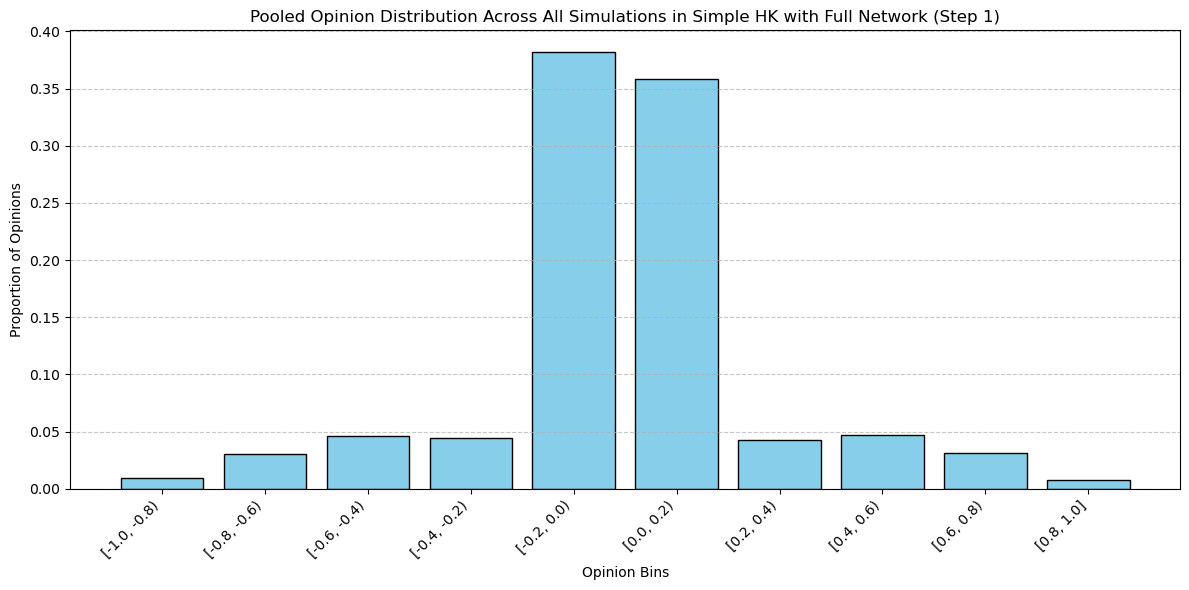

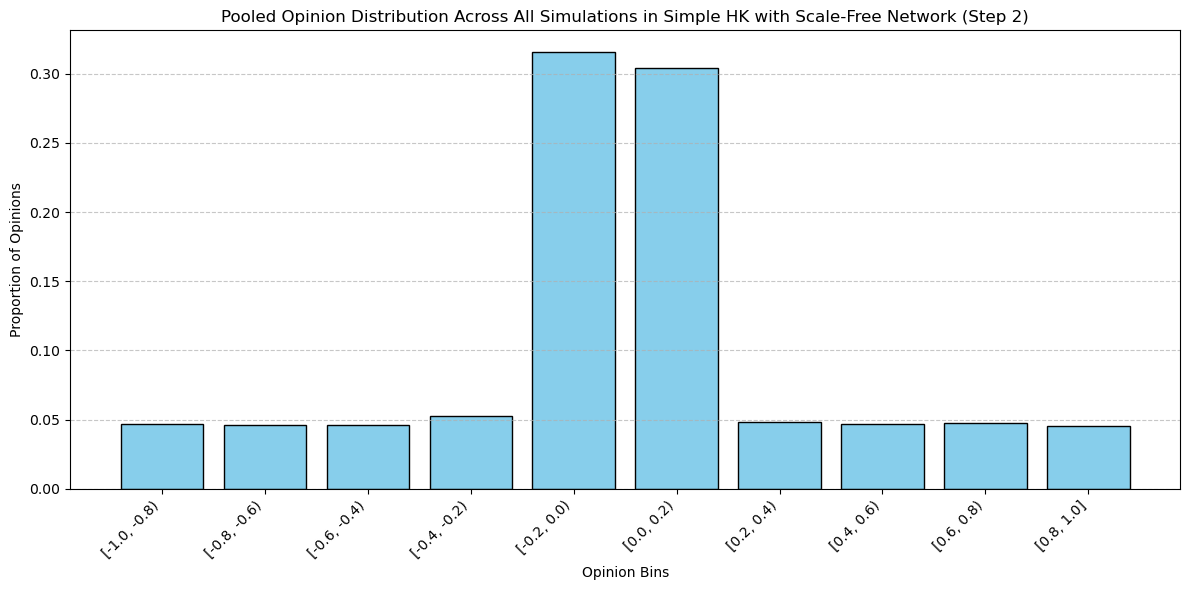

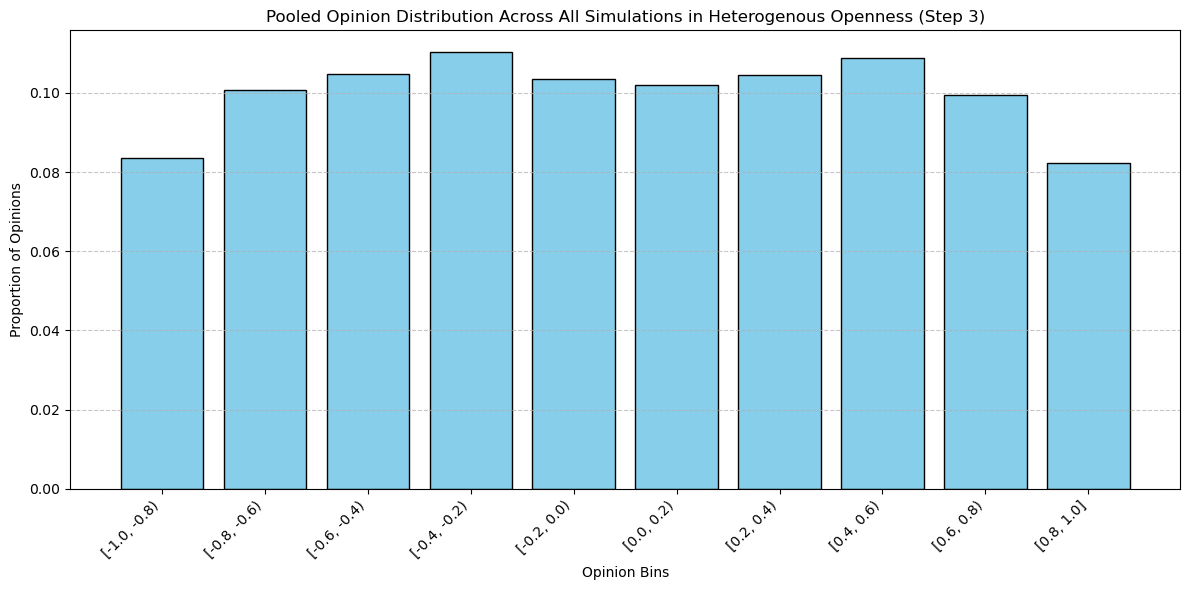

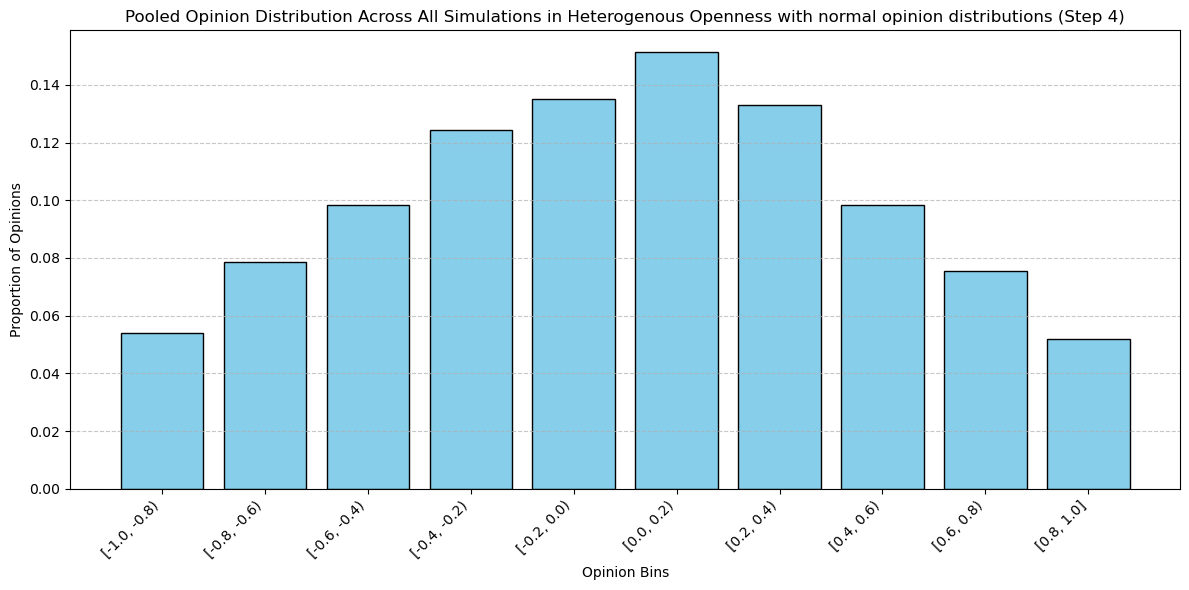

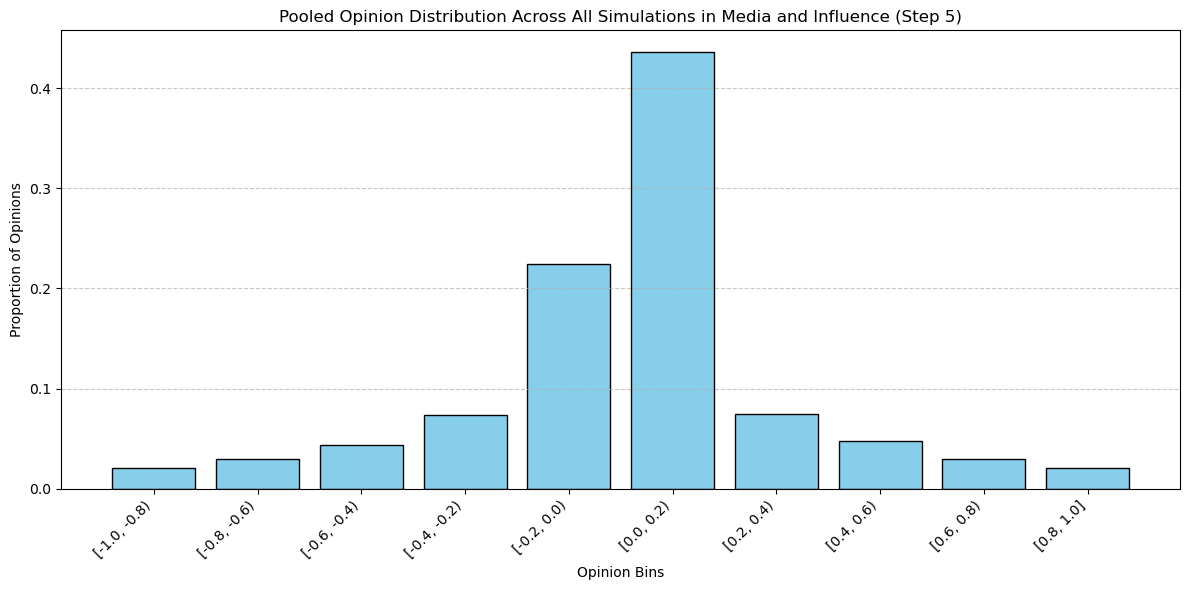

In [14]:
for stepNo in steps_to_process:
    simulations_df = simulation_df_step[stepNo - 1]
    # Create pooled histogram of all opinions
    all_opinions = np.concatenate(simulations_df['individual_opinions'].values)
    pooled_counts, _ = np.histogram(all_opinions, bins=bin_edges)
    pooled_distribution = pooled_counts / pooled_counts.sum()
    
    # Plot the pooled histogram
    plt.figure(figsize=(12, 6))
    plt.bar(range(1, 11), pooled_distribution, color='skyblue', edgecolor='black')
    plt.xticks(range(1, 11), bin_intervals, rotation=45, ha='right')
    plt.xlabel('Opinion Bins')
    plt.ylabel('Proportion of Opinions')
    plt.title('Pooled Opinion Distribution Across All Simulations in ' +  step_titles[stepNo - 1] + " (Step " +  str(stepNo)+ ")")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig('pooled_opinion_distribution.png', dpi=300)
    # plt.show()

## Generating Individual histograms for specific simulations

In [15]:
import os
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# Define bin edges and labels
bin_edges = np.array([-1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
bin_intervals = [
    "[-1.0, -0.8)", "[-0.8, -0.6)", "[-0.6, -0.4)", "[-0.4, -0.2)", 
    "[-0.2, 0.0)", "[0.0, 0.2)", "[0.2, 0.4)", "[0.4, 0.6)", 
    "[0.6, 0.8)", "[0.8, 1.0]"
]

def save_simulation_histogram(row, index, stepNum, histograms_save_path):
    # histograms_save_path = os.join(histograms_save_path, step_output_folder_name[stepNum - 1])
    """Create and save histogram for a single simulation with both initial and final opinions"""
    # Extract parameters for title and filename based on step number
    if stepNum == 1 or stepNum == 2:
        # Only epsM for steps 1 and 2
        filename = f"sim_{index:04d}_epsM{row['epsM']:.2f}.png".replace(".", "dot")
        title = f"Opinion Distribution (Step {stepNum}): εμ={row['epsM']:.2f}"
    elif stepNum == 3:
        # epsM and epsSD for step 3
        filename = f"sim_{index:04d}_epsM{row['epsM']:.2f}_epsSD{row['epsSD']:.2f}.png".replace(".", "dot")
        title = f"Opinion Distribution (Step {stepNum}): εμ={row['epsM']:.2f}, εσ={row['epsSD']:.2f}"
    else:
        # All parameters for step 4 and beyond
        filename = (
            f"sim_{index:04d}_"
            f"epsM{row['epsM']:.2f}_epsSD{row['epsSD']:.2f}_"
            f"OpM{row['OpM']:.2f}_OpSD{row['OpSD']:.2f}_"
            f"MedM{row['MedM']:.2f}_MedSD{row['MedSD']:.2f}__"
            f"MedInf{row['MedInfF']:.2f}.png"
        ).replace(".", "dot")
        title = (
            f"Opinion Distribution (Step {stepNum}): "
            f"εμ={row['epsM']:.2f}, εσ={row['epsSD']:.2f}, "
            f"Medμ={row['MedM']:.2f}, Medσ={row['MedSD']:.2f}, "
            f"MedInfF={row['MedInfF']:.2f}"
        )
    
    # Create figure
    plt.figure(figsize=(12, 7))
    
    # Plot histograms for both initial and final opinions
    n_initial, _, _ = plt.hist(
        row['individual_initial_opinions'],
        bins=bin_edges,
        density=False,
        alpha=0.5,
        color='steelblue',
        edgecolor='black',
        label='Initial Opinions'
    )
    
    n_final, bins, patches = plt.hist(
        row['individual_opinions'], 
        bins=bin_edges, 
        density=False, 
        alpha=0.7, 
        color='green',
        edgecolor='black',
        label='Final Opinions'
    )
    


    # Add vertical lines at media positions for reference
    if(stepNo == 5):
        for medop in row['media_opinions']:
                plt.axvline(medop, color='red', linestyle='--', alpha=0.5, label='Media Opinion' if medop == row['media_opinions'][0] else "")
    
    # Format plot
    plt.title(title, fontsize=14, pad=20)
    plt.xlabel('Opinion Value', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xticks(bin_edges, rotation=45)
    plt.xlim(-1.05, 1.05)
    # plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend()
    
    # Add bin labels
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    # for i in range(len(bin_intervals)):
    #     plt.text(
    #         bin_centers[i], max(n_final[i], n_initial[i]) + 0.01, 
    #         f"F:{n_final[i]}\nI:{n_initial[i]}\n{bin_intervals[i]}", 
    #         ha='center', va='bottom', fontsize=8
    #     )
    
    # Add statistics box
    stats_text = (
        f"N: {len(row['individual_opinions'])}\n"
        f"Initial Mean: {np.mean(row['individual_initial_opinions']):.3f}\n"
        f"Final Mean: {np.mean(row['individual_opinions']):.3f}\n"
        f"Change: {np.mean(row['individual_opinions']) - np.mean(row['individual_initial_opinions']):.3f}"
    )
    
    plt.gcf().text(0.50, 0.85, stats_text, fontsize=10, 
                   bbox=dict(facecolor='white', alpha=0.5))
    
    # Save and close
    plt.tight_layout()
    plt.savefig(os.path.join(histograms_save_path, filename), dpi=150)
    plt.close()
    return filename

# Function to generate histogram by cumulative index
def generate_histogram_by_cumulative_index(cumulative_index, histograms_save_path):
    """Generate histogram for a simulation based on its cumulative index"""
    for stepNo in steps_to_process:
        simulations_df = simulation_df_step[stepNo - 1]
        if cumulative_index in simulations_df['cumulative_simulation_index'].values:
            row = simulations_df[simulations_df['cumulative_simulation_index'] == cumulative_index].iloc[0]
            model_index = row['model_simulation_index']
            return save_simulation_histogram(row, cumulative_index, stepNo, histograms_save_path)
    print(f"Error: Cumulative index {cumulative_index} not found.")
    return None

# Function to generate histogram by step and model index
def generate_histogram_by_step_model_index(stepNo, model_index, histograms_save_path):
    """Generate histogram for a simulation based on step number and model index"""
    if stepNo > len(simulation_df_step):
        print(f"Error: Step number {stepNo} is out of range.")
        return None
    
    simulations_df = simulation_df_step[stepNo - 1]
    if model_index not in simulations_df['model_simulation_index'].values:
        print(f"Error: Model index {model_index} not found in step {stepNo}.")
        return None
    
    row = simulations_df[simulations_df['model_simulation_index'] == model_index].iloc[0]
    cumulative_index = row['cumulative_simulation_index']
    return save_simulation_histogram(row, cumulative_index, stepNo, histograms_save_path)

# Setup directories for each step
for stepNo in steps_to_process:
    # Setup Path
    histograms_save_path = os.path.join(plots_folder_path, "selected_sims_histograms")
    if not os.path.exists(histograms_save_path):
        os.makedirs(histograms_save_path)
    
    # You can now call either:
    # generate_histogram_by_cumulative_index(1, histograms_save_path)
    # or
    generate_histogram_by_step_model_index(4, 1, histograms_save_path)

# Load Survey Data.

In [16]:
# Set up paths
folder_path = "data/EU_dataset"
file_title = "Cleaned_Parlemeter_Data-LeftRight"
file_name = file_title + ".xlsx"
survey_file = os.path.join(folder_path, file_name)

sheets = pd.ExcelFile(survey_file).sheet_names[1:]  # Skip 'RowHeaders'

survey_data = []

for sheet in sheets:
    country = sheet.split("-")[0]  # Extract country code (e.g., "BE")
    df_sheet = pd.read_excel(survey_file, sheet_name=sheet, header=None)
    
    # Years are in the first row
    years = df_sheet.iloc[0, :].tolist()
    
    # Extract counts for positions 1-10 (skip % rows and DK/Refusal)
    counts_matrix = []
    for i in range(10):  # Positions 1-10
        row_index = 1 + 2 * i  # Count rows are at indices 1,3,5,...,19
        counts_matrix.append(df_sheet.iloc[row_index, :].tolist())
    
    # Process each year
    for j, year in enumerate(years):
        counts = [float(counts_matrix[i][j]) for i in range(10)]
        total_valid = sum(counts)
        
        # Normalized distribution (1-10)
        distribution = [c / total_valid for c in counts]

        # Pool bins 5 and 6
        pooled_counts = counts[:4] + [counts[4] + counts[5]] + counts[6:]
        pooled_distribution = [c / total_valid for c in pooled_counts]
        
        survey_data.append({
            "country": country,
            "year": int(year),
            "binned_distribution": distribution,
            "binned_distribution_5_6clubbed": pooled_distribution,
            "total_respondents": total_valid
        })
survey_df = pd.DataFrame(survey_data)

In [17]:
simulation_df_step[0]

,epsM,epsSD,OpD,OpM,OpSD,NetworkType,NAgents,RandomSeed,MedInfF,MedD,...,ScaleFreeDegree,binned_opinions,binned_distribution,bin_intervals,binned_distributions_5_6clubbed,binned_initial_opinions,binned_initial_distribution,binned_initial_distributions_5_6clubbed,model_simulation_index,cumulative_simulation_index
0,0.01,0.0,m,0.0,0.49,Full,1000,10,0.91,m,...,1,"[0, 5, 1, 7, 2, 5, 7, 7, 7, 9, 3, 4, 9, 6, 4, ...","[0.102, 0.092, 0.121, 0.088, 0.1, 0.101, 0.096...","[[-1.0, -0.8), [-0.8, -0.6), [-0.6, -0.4), [-0...","[0.102, 0.092, 0.121, 0.088, 0.201, 0.096, 0.1...","[0, 5, 1, 7, 2, 5, 7, 7, 7, 9, 3, 4, 9, 6, 4, ...","[0.102, 0.097, 0.103, 0.098, 0.088, 0.106, 0.1...","[0.102, 0.097, 0.103, 0.098, 0.194, 0.107, 0.1...",1,1
1,0.01,0.0,m,0.0,0.49,Full,1000,11,0.91,m,...,1,"[9, 9, 6, 9, 0, 7, 2, 2, 0, 6, 8, 7, 3, 4, 1, ...","[0.102, 0.089, 0.113, 0.107, 0.091, 0.099, 0.0...","[[-1.0, -0.8), [-0.8, -0.6), [-0.6, -0.4), [-0...","[0.102, 0.089, 0.113, 0.107, 0.19, 0.078, 0.10...","[9, 9, 6, 9, 0, 7, 2, 2, 0, 6, 8, 6, 4, 4, 1, ...","[0.096, 0.106, 0.102, 0.096, 0.089, 0.108, 0.0...","[0.096, 0.106, 0.102, 0.096, 0.197, 0.099, 0.1...",2,2
2,0.01,0.0,m,0.0,0.49,Full,1000,12,0.91,m,...,1,"[0, 5, 3, 0, 2, 7, 5, 4, 8, 4, 7, 0, 4, 3, 5, ...","[0.11, 0.086, 0.095, 0.09, 0.08, 0.11, 0.09, 0...","[[-1.0, -0.8), [-0.8, -0.6), [-0.6, -0.4), [-0...","[0.11, 0.086, 0.095, 0.09, 0.19, 0.09, 0.127, ...","[0, 5, 3, 0, 2, 8, 5, 4, 8, 4, 7, 0, 4, 3, 5, ...","[0.093, 0.107, 0.088, 0.092, 0.092, 0.101, 0.0...","[0.093, 0.107, 0.088, 0.092, 0.193, 0.095, 0.1...",3,3
3,0.01,0.0,m,0.0,0.49,Full,1000,13,0.91,m,...,1,"[9, 1, 1, 6, 2, 1, 5, 0, 7, 3, 3, 5, 9, 3, 2, ...","[0.109, 0.115, 0.099, 0.132, 0.069, 0.125, 0.0...","[[-1.0, -0.8), [-0.8, -0.6), [-0.6, -0.4), [-0...","[0.109, 0.115, 0.099, 0.132, 0.194, 0.062, 0.0...","[9, 0, 1, 6, 2, 1, 5, 0, 7, 4, 3, 6, 9, 3, 2, ...","[0.119, 0.096, 0.109, 0.107, 0.092, 0.103, 0.0...","[0.119, 0.096, 0.109, 0.107, 0.195, 0.085, 0.0...",4,4
4,0.01,0.0,m,0.0,0.49,Full,1000,14,0.91,m,...,1,"[5, 3, 9, 2, 9, 3, 5, 5, 6, 1, 8, 9, 6, 5, 4, ...","[0.093, 0.122, 0.085, 0.112, 0.102, 0.084, 0.0...","[[-1.0, -0.8), [-0.8, -0.6), [-0.6, -0.4), [-0...","[0.093, 0.122, 0.085, 0.112, 0.186, 0.082, 0.1...","[5, 3, 9, 2, 9, 3, 5, 5, 6, 1, 8, 9, 6, 5, 4, ...","[0.099, 0.101, 0.1, 0.098, 0.103, 0.09, 0.085,...","[0.099, 0.101, 0.1, 0.098, 0.193, 0.085, 0.106...",5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,0.70,0.0,m,0.0,0.49,Full,1000,5,0.91,m,...,1,"[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[[-1.0, -0.8), [-0.8, -0.6), [-0.6, -0.4), [-0...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]","[6, 1, 2, 1, 7, 8, 9, 6, 7, 7, 7, 1, 3, 8, 3, ...","[0.085, 0.111, 0.102, 0.11, 0.096, 0.11, 0.101...","[0.085, 0.111, 0.102, 0.11, 0.2060000000000000...",2096,2096
2096,0.70,0.0,m,0.0,0.49,Full,1000,6,0.91,m,...,1,"[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[[-1.0, -0.8), [-0.8, -0.6), [-0.6, -0.4), [-0...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]","[5, 9, 0, 9, 3, 6, 5, 4, 3, 0, 0, 4, 6, 7, 3, ...","[0.128, 0.111, 0.101, 0.103, 0.096, 0.089, 0.0...","[0.128, 0.111, 0.101, 0.103, 0.185, 0.091, 0.0...",2097,2097
2097,0.70,0.0,m,0.0,0.49,Full,1000,7,0.91,m,...,1,"[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","[[-1.0, -0.8), [-0.8, -0.6), [-0.6, -0.4), [-0...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]","[0, 5, 7, 6, 4, 4, 3, 9, 2, 1, 8, 4, 2, 9, 5, ...","[0.09, 0.094, 0.093, 0.101, 0.113, 0.08, 0.11,...","[0.09, 0.094, 0.093, 0.101, 0.193, 0.11, 0.101...",2098,2098
2098,0.70,0.0,m,0.0,0.49,Full,1000,8,0.91,m,...,1,"[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[[-1.0, -0.8), [-0.8, -0.6), [-0.6, -0.4), [-0...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]","[7,

## Fitting Data for all Steps

In [18]:
# Ensure vectors are numpy arrays of floats
def to_array(x):
    return np.array(x, dtype=float)

# List of dataframes for the fits (now combined initial and final)
jsfit_dfs_stepwise = []
best_jsfits_stepwise = []

for stepNo in steps_to_process:
    simulations_df = simulation_df_step[stepNo - 1]
    this_fit_data = []
    
    # Precompute survey distributions once
    survey_dists = []
    for _, surv_row in survey_df.iterrows():
        survey_dists.append({
            'country': surv_row['country'],
            'year': surv_row['year'],
            'distribution': to_array(surv_row['binned_distribution_5_6clubbed'])
        })
    
    for sim_idx, sim_row in simulations_df.iterrows():
        sim_dist_final = to_array(sim_row['binned_distributions_5_6clubbed'])
        sim_dist_initial = to_array(sim_row['binned_initial_distributions_5_6clubbed'])
        # print(sim_row)
        # Extract simulation parameters once
        sim_params = {
            'cum_sim_index': sim_row['cumulative_simulation_index'],
            'epsM': sim_row['epsM'],
            'epsSD': sim_row['epsSD'],
            'OpM': sim_row['OpM'],
            'OpSD': sim_row['OpSD'],
            'MedM': sim_row['MedM'],
            'RS': sim_row['RandomSeed'],
            'MedSD': sim_row['MedSD'],
            'MedInfF': sim_row['MedInfF']
        }
        
        for surv_data in survey_dists:
            surv_dist = surv_data['distribution']
            
            # Jensen–Shannon divergence for both initial and final
            jsd_final = jensenshannon(sim_dist_final, surv_dist)
            jsd_initial = jensenshannon(sim_dist_initial, surv_dist)
            
            # Create a single entry with both distances
            this_fit_data.append({
                **sim_params,  # Unpack simulation parameters
                'country': surv_data['country'],
                'year': surv_data['year'],
                'distance_final': jsd_final,
                'distance_initial': jsd_initial,
                'distance_delta': jsd_final - jsd_initial
            })
    
    # Create a single DataFrame for this step
    thisfit_df = pd.DataFrame(this_fit_data)
    jsfit_dfs_stepwise.append(thisfit_df)
    
    # Extract best fits for both initial and final
    best_fit_final = thisfit_df.sort_values('distance_final').groupby(['country', 'year']).head(5)
    best_fit_initial = thisfit_df.sort_values('distance_initial').groupby(['country', 'year']).head(5)
    
    # Combine best fits into a single DataFrame with a type indicator
    best_fit_final['distance_type'] = 'final'
    best_fit_initial['distance_type'] = 'initial'
    
    best_fit_combined = pd.concat([best_fit_final, best_fit_initial], ignore_index=True)
    best_jsfits_stepwise.append(best_fit_combined)

In [19]:
jsfit_dfs_stepwise[1].nlargest(30, 'distance_final')

,cum_sim_index,epsM,epsSD,OpM,OpSD,MedM,RS,MedSD,MedInfF,country,year,distance_final,distance_initial,distance_delta
346593,3594,0.51,0.0,0.0,0.49,0.0,3,0.79,0.91,SE,2010,0.611736,0.191615,0.420121
348681,3603,0.52,0.0,0.0,0.49,0.0,12,0.79,0.91,SE,2010,0.611736,0.213206,0.398530
350537,3611,0.52,0.0,0.0,0.49,0.0,1,0.79,0.91,SE,2010,0.611736,0.208232,0.403504
351001,3613,0.52,0.0,0.0,0.49,0.0,21,0.79,0.91,SE,2010,0.611736,0.177595,0.434141
353321,3623,0.52,0.0,0.0,0.49,0.0,30,0.79,0.91,SE,2010,0.611736,0.188557,0.423179
353553,3624,0.52,0.0,0.0,0.49,0.0,3,0.79,0.91,SE,2010,0.611736,0.191615,0.420121
354713,3629,0.52,0.0,0.0,0.49,0.0,8,0.79,0.91,SE,2010,0.611736,0.186659,0.425077
355641,3633,0.53,0.0,0.0,0.49,0.0,12,0.79,0.91,SE,2010,0.611736,0.213206,0.398530
357033,3639,0.53,0.0,0.0,0.49,0.0,18,0.79,0.91,SE,2010,0.611736,0.201645,0.410091
357961,3643,0.53,0.0,0.0,0.49,0.0,21,0.79,0.91,SE,2010,0.611736,0.177595,0.434141


In [20]:
step1fits=jsfit_dfs_stepwise[0]
step1fits[step1fits['epsM']==0.21]['distance_final'].mean()

np.float64(0.6311266423741205)

## Plotting JSD v/s Epsilon

### Steps 1 and 2

In [22]:
best_fit_threshold = 0.05 # Set this to filter the best fits

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("colorblind")

# Create output directory for plots
plot_output_dir = os.path.join(plots_folder_path, "Fit_Plots")
os.makedirs(plot_output_dir, exist_ok=True)

# Process steps 1 and 2 (index 0 and 1 in our list)
for step_idx in steps_to_process:
    stepNo = step_idx + 1  # Convert to 1-based indexing
    fit_df = jsfit_dfs_stepwise[step_idx]
    
    print(f"Processing Step {stepNo} with {len(fit_df)} data points")
    
    # Plot 1: Final distance against epsM
    plt.figure(figsize=(10, 6))
    
    # Group by epsM and calculate mean and standard error
    grouped = fit_df.groupby('epsM')['distance_final'].agg(['mean', 'std', 'count'])
    grouped['se'] = grouped['std'] / np.sqrt(grouped['count'])

    
    grouped_initial = fit_df.groupby('epsM')['distance_initial'].agg(['mean', 'std', 'count'])
    grouped_initial['se']  =  grouped_initial['std'] / np.sqrt(grouped_initial['count'])

    
    plt.errorbar(grouped.index, grouped['mean'], yerr=grouped['se'], 
                 fmt='o-', capsize=5, capthick=2, linewidth=2, markersize=8, label="End of Sim divergence")

    #Initial for comparison
    plt.errorbar(grouped_initial.index, grouped_initial['mean'], yerr=grouped_initial['se'], 
                 fmt='o-', capsize=5, capthick=2, linewidth=2, markersize=8, label="Beginning of Sim divergence")
    
    plt.xlabel('ε (Openness)', fontsize=14)
    plt.ylabel('End of Sim Jensen-Shannon Divergence', fontsize=14)
    plt.title(f'Final Fit Quality vs Openness (ε)\n{step_titles[stepNo - 1]}', fontsize=16)
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    
    plt.savefig(os.path.join(plot_output_dir, f'step{stepNo}_final_vs_epsM.png'), dpi=300, bbox_inches='tight')
    plt.close()
    
    # Plot 2: Final distance against epsM (only improved fits)
    plt.figure(figsize=(10, 6))
    
    # Filter for improved fits (final distance < initial distance)
    improved_fits = fit_df[fit_df['distance_delta'] < 0]
    
    if len(improved_fits) > 0:
        # Group by epsM and calculate statistics
        grouped_improved = improved_fits.groupby('epsM')['distance_final'].agg(['mean', 'std', 'count'])
        grouped_improved['se'] = grouped_improved['std'] / np.sqrt(grouped_improved['count'])
        
        plt.errorbar(grouped_improved.index, grouped_improved['mean'], yerr=grouped_improved['se'], 
                     fmt='s-', capsize=5, capthick=2, linewidth=2, markersize=8, color='green', label = "Improved fits only")
        
        # Add original for comparison (light gray)
        plt.errorbar(grouped.index, grouped['mean'], yerr=grouped['se'], 
                     fmt='o--', capsize=3, capthick=1, linewidth=1, markersize=5, 
                     color='gray', alpha=0.5, label='All simulations')
        
        plt.xlabel('ε (Openness)', fontsize=14)
        plt.ylabel('End of Sim Jensen-Shannon Divergence', fontsize=14)
        plt.title(f'Improved Fits Only (Final < Initial)\n{step_titles[stepNo - 1]}', fontsize=16)
        plt.grid(True, alpha=0.3)
        plt.legend()
        plt.tight_layout()
        plt.savefig(os.path.join(plot_output_dir, f'step{stepNo}_improved_final_vs_epsM.png'), dpi=300, bbox_inches='tight')
        plt.close()
    else:
        print(f"No improved fits found for Step {stepNo}")
        plt.close()
    
    # Plot 3: Delta distance against epsM
    plt.figure(figsize=(10, 6))
    
    # Group by epsM and calculate mean and standard error for delta
    grouped_delta = fit_df.groupby('epsM')['distance_delta'].agg(['mean', 'std', 'count'])
    grouped_delta['se'] = grouped_delta['std'] / np.sqrt(grouped_delta['count'])
    
    # Create the plot
    plt.errorbar(grouped_delta.index, grouped_delta['mean'], yerr=grouped_delta['se'], 
                 fmt='o-', capsize=5, capthick=2, linewidth=2, markersize=8, color='purple')
    
    # Add horizontal line at zero for reference
    plt.axhline(y=0, color='red', linestyle='--', alpha=0.7, linewidth=1)
    
    plt.xlabel('ε (Openness)', fontsize=14)
    plt.ylabel('Δ Divergence (Final - Initial)', fontsize=14)
    plt.title(f'Fit Improvement vs ε (Negative values = Improvement)\n{step_titles[stepNo - 1]}', fontsize=16)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(os.path.join(plot_output_dir, f'step{stepNo}_delta_vs_epsM.png'), dpi=300, bbox_inches='tight')
    plt.close()


    # Plot 4: Only the best of the best fits.
    best_fits = fit_df[fit_df['distance_final'] < best_fit_threshold]
    print("Best fits dataframe: \n")
    print(best_fits)
    if len(best_fits) > 0:
        # Group by epsM and calculate statistics
        grouped_best = best_fits.groupby('epsM')['distance_final'].agg(['mean', 'std', 'count'])
        grouped_best['se'] = grouped_best['std'] / np.sqrt(grouped_best['count'])

        
        grouped_best_initial = best_fits.groupby('epsM')['distance_initial'].agg(['mean', 'std', 'count'])
        grouped_best_initial['se'] = grouped_best_initial['std'] / np.sqrt(grouped_best_initial['count'])
        
        plt.errorbar(grouped_best.index, grouped_best['mean'], yerr=grouped_best['se'], 
                     fmt='s-', capsize=5, capthick=2, linewidth=2, markersize=8, color='green', label = "End of Sim Divergence")
        
        # Initial for comparison
        plt.errorbar(grouped_best.index, grouped_best['mean'], yerr=grouped_best['se'], 
                 fmt='o-', capsize=5, capthick=2, linewidth=2, markersize=8, label="Beginning of Sim divergence")
        
        plt.xlabel('ε (Openness)', fontsize=14)
        plt.ylabel('End of Sim Jensen-Shannon Divergence', fontsize=14)
        plt.title(f'Best Fits Only (JS < {best_fit_threshold})\n{step_titles[stepNo - 1]}', fontsize=16)
        plt.grid(True, alpha=0.3)
        plt.legend()
        plt.tight_layout()
        plt.savefig(os.path.join(plot_output_dir, f'step{stepNo}_best_final_vs_epsM.png'), dpi=300, bbox_inches='tight')
        plt.close()
    else:
        print(f"No good fits found for Step {stepNo}")
        plt.close()
    
    
    
    # Additional analysis: Print summary statistics
    print(f"\nStep {stepNo} Summary Statistics:")
    print(f"Total simulations: {fit_df['cum_sim_index'].nunique()}")
    print(f"Total country-year combinations: {fit_df[['country', 'year']].drop_duplicates().shape[0]}")
    print(f"Mean final distance: {fit_df['distance_final'].mean():.4f}")
    print(f"Mean initial distance: {fit_df['distance_initial'].mean():.4f}")
    print(f"Mean delta: {fit_df['distance_delta'].mean():.4f}")
    print(f"Percentage improved: {(len(improved_fits) / len(fit_df) * 100):.1f}%")
    
    # Best epsM values
    best_epsM_final = grouped.sort_values('mean').index[0]
    best_epsM_delta = grouped_delta.sort_values('mean').index[0]
    print(f"Best epsM for final distance: {best_epsM_final:.3f}")
    print(f"Best epsM for improvement: {best_epsM_delta:.3f}")

print(f"\nAll plots saved to: {plot_output_dir}")

Processing Step 1 with 487200 data points
Best fits dataframe: 

Empty DataFrame
Columns: [cum_sim_index, epsM, epsSD, OpM, OpSD, MedM, RS, MedSD, MedInfF, country, year, distance_final, distance_initial, distance_delta]
Index: []
No good fits found for Step 1

Step 1 Summary Statistics:
Total simulations: 2100
Total country-year combinations: 224
Mean final distance: 0.5082
Mean initial distance: 0.2559
Mean delta: 0.2524
Percentage improved: 1.2%
Best epsM for final distance: 0.010
Best epsM for improvement: 0.010
Processing Step 2 with 487200 data points
Best fits dataframe: 

Empty DataFrame
Columns: [cum_sim_index, epsM, epsSD, OpM, OpSD, MedM, RS, MedSD, MedInfF, country, year, distance_final, distance_initial, distance_delta]
Index: []
No good fits found for Step 2

Step 2 Summary Statistics:
Total simulations: 2100
Total country-year combinations: 224
Mean final distance: 0.3729
Mean initial distance: 0.2559
Mean delta: 0.1171
Percentage improved: 15.8%
Best epsM for final dist

## Color Plots

In [34]:
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

# Create output directory for plots
plot_output_dir = os.path.join(plots_folder_path, "Colorplots")
best_fit_threshold = 0.05

# Greek symbols for parameter names
param_labels = {
    'epsM': r'$\mu_{\varepsilon}$',
    'epsSD': r'$\sigma_{\varepsilon}$', 
    'OpSD': r'$\sigma_{InitialOp}$',
    'MedM': r'$\mu_{MediaOp}$',
    'MedSD': r'$\sigma_{MediaOp}$',
    'MedInfF': 'Media Influence'
}

# Global style settings
plt.rcParams.update({
    'font.size': 14,
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'xtick.labelsize': 8,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'figure.titlesize': 18
})

# Global flags
SHOW_GRID = True  # Set to True to enable grid

# Common color normalization for all plots across all steps
def get_global_color_norm(variant, all_steps_data):
    """Get common color normalization across all steps for a variant"""
    all_values = []
    
    for step_data in all_steps_data:
        if step_data is not None and len(step_data) > 0:
            if variant == 'mean_jsd':
                values = step_data.groupby(['epsM', 'epsSD'])['distance_final'].mean()
            elif variant == 'mean_jsd_improved':
                improved = step_data[step_data['distance_delta'] < 0]
                values = improved.groupby(['epsM', 'epsSD'])['distance_final'].mean()
            elif variant == 'mean_jsd_best_fit':
                best_fit = step_data[step_data['distance_final'] < best_fit_threshold]
                values = best_fit.groupby(['epsM', 'epsSD'])['distance_final'].mean()
            elif variant == 'best_jsd':
                values = step_data.groupby(['epsM', 'epsSD'])['distance_final'].min()
            
            if len(values) > 0:
                all_values.extend(values.values)
    
    if not all_values:
        return colors.Normalize(vmin=0, vmax=1)
    
    return colors.Normalize(vmin=min(all_values), vmax=max(all_values))

# Function to create categorical heatmap
def create_categorical_heatmap(pivot_table, xlabel, ylabel, title, norm, cmap='viridis_r', ax=None):
    """Create a categorical heatmap with proper discrete parameter handling"""
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 8))
    
    # Get the unique parameter values
    x_categories = pivot_table.columns.tolist()
    y_categories = pivot_table.index.tolist()
    
    # Create the heatmap
    im = ax.imshow(pivot_table.values, origin='lower', aspect='auto',
                   norm=norm, cmap=cmap)
    
    # Set ticks and labels at cell centers
    ax.set_xticks(np.arange(len(x_categories)))
    ax.set_yticks(np.arange(len(y_categories)))
    ax.set_xticklabels([f"{x:.2f}" for x in x_categories])
    ax.set_yticklabels([f"{y:.2f}" for y in y_categories])
    
    # Add proper grid lines if enabled
    if SHOW_GRID:
        # Add grid lines at cell boundaries
        ax.set_xticks(np.arange(len(x_categories) + 1) - 0.5, minor=True)
        ax.set_yticks(np.arange(len(y_categories) + 1) - 0.5, minor=True)
        ax.grid(which="minor", color="white", linestyle='-', linewidth=1.5, alpha=0.8)
        ax.tick_params(which="minor", length=0)
    
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.set_title(title, fontsize=16)
    
    return im

# Function to process data for a variant
def process_variant_data(df, variant):
    """Process data for different variants"""
    if variant == 'mean_jsd':
        return df.groupby(['epsM', 'epsSD'])['distance_final'].mean().reset_index()
    elif variant == 'mean_jsd_improved':
        improved = df[df['distance_delta'] < 0]
        return improved.groupby(['epsM', 'epsSD'])['distance_final'].mean().reset_index()
    elif variant == 'mean_jsd_best_fit':
        best_fit = df[df['distance_final'] < best_fit_threshold]
        return best_fit.groupby(['epsM', 'epsSD'])['distance_final'].mean().reset_index()
    elif variant == 'best_jsd':
        return df.groupby(['epsM', 'epsSD'])['distance_final'].min().reset_index()

# Collect all data for global normalization
all_steps_data = jsfit_dfs_stepwise[2:5]  # Steps 3, 4, 5

# Precompute global norms for each variant
global_norms = {}
variants = ['mean_jsd', 'mean_jsd_improved', 'mean_jsd_best_fit', 'best_jsd']

for variant in variants:
    global_norms[variant] = get_global_color_norm(variant, all_steps_data)
    print(f"{variant}: vmin={global_norms[variant].vmin:.4f}, vmax={global_norms[variant].vmax:.4f}")

# Step 3: epsM and epsSD only
print("Processing Step 3...")
step3_dir = os.path.join(plot_output_dir, "step3")
os.makedirs(step3_dir, exist_ok=True)

step3_data = jsfit_dfs_stepwise[2] if len(jsfit_dfs_stepwise) > 2 else None

if step3_data is not None:
    # Get unique parameter values for the entire step
    unique_epsM = sorted(step3_data['epsM'].unique())
    unique_epsSD = sorted(step3_data['epsSD'].unique())
    
    for variant in variants:
        variant_data = process_variant_data(step3_data, variant)
        
        if len(variant_data) > 0:
            # Create pivot table and ensure all parameter combinations are represented
            pivot = variant_data.pivot_table(index='epsSD', columns='epsM', values='distance_final')
            pivot = pivot.reindex(index=unique_epsSD, columns=unique_epsM)
            
            fig, ax = plt.subplots(figsize=(12, 9))
            norm = global_norms[variant]
            
            im = create_categorical_heatmap(pivot, param_labels['epsM'], param_labels['epsSD'],
                                          f'Step 3: {variant.replace("_", " ").title()}', norm, ax=ax)
            
            # Add colorbar
            cbar = plt.colorbar(im, ax=ax)
            cbar.set_label('Jensen-Shannon Distance', fontsize=14)
            
            # Save best_jsd directly in step folder, others in subfolders
            if variant == 'best_jsd':
                plt.savefig(os.path.join(step3_dir, f'step3_{variant}.png'), 
                           dpi=300, bbox_inches='tight')
            else:
                variant_dir = os.path.join(step3_dir, variant)
                os.makedirs(variant_dir, exist_ok=True)
                plt.savefig(os.path.join(variant_dir, f'step3_{variant}.png'), 
                           dpi=300, bbox_inches='tight')
            
            plt.close()

# Step 4: epsM, epsSD, and OpSD
print("Processing Step 4...")
step4_dir = os.path.join(plot_output_dir, "step4")
os.makedirs(step4_dir, exist_ok=True)

step4_data = jsfit_dfs_stepwise[3] if len(jsfit_dfs_stepwise) > 3 else None

if step4_data is not None:
    # Get unique parameter values for the entire step
    unique_epsM = sorted(step4_data['epsM'].unique())
    unique_epsSD = sorted(step4_data['epsSD'].unique())
    unique_OpSD = sorted(step4_data['OpSD'].unique())
    
    for variant in variants:
        for OpSD_val in unique_OpSD:
            OpSD_data = step4_data[step4_data['OpSD'] == OpSD_val]
            variant_data = process_variant_data(OpSD_data, variant)
            
            if len(variant_data) > 0:
                # Create pivot table and ensure all parameter combinations are represented
                pivot = variant_data.pivot_table(index='epsSD', columns='epsM', values='distance_final')
                pivot = pivot.reindex(index=unique_epsSD, columns=unique_epsM)
                
                fig, ax = plt.subplots(figsize=(12, 9))
                norm = global_norms[variant]
                
                im = create_categorical_heatmap(pivot, param_labels['epsM'], param_labels['epsSD'],
                                              f'Step 4: {variant.replace("_", " ").title()}\n{param_labels["OpSD"]} = {OpSD_val:.2f}',
                                              norm, ax=ax)
                
                # Add colorbar
                cbar = plt.colorbar(im, ax=ax)
                cbar.set_label('Jensen-Shannon Distance', fontsize=14)
                
                # Save best_jsd directly in step folder, others in subfolders
                if variant == 'best_jsd':
                    plt.savefig(os.path.join(step4_dir, f'step4_OpSD_{OpSD_val:.2f}_{variant}.png'), 
                               dpi=300, bbox_inches='tight')
                else:
                    variant_dir = os.path.join(step4_dir, variant)
                    os.makedirs(variant_dir, exist_ok=True)
                    plt.savefig(os.path.join(variant_dir, f'step4_OpSD_{OpSD_val:.2f}_{variant}.png'), 
                               dpi=300, bbox_inches='tight')
                
                plt.close()

# Step 5: Full parameter space
print("Processing Step 5...")
step5_dir = os.path.join(plot_output_dir, "step5")
os.makedirs(step5_dir, exist_ok=True)

step5_data = jsfit_dfs_stepwise[4] if len(jsfit_dfs_stepwise) > 4 else None

if step5_data is not None:
    # Get unique parameter values for the entire step
    unique_epsM = sorted(step5_data['epsM'].unique())
    unique_epsSD = sorted(step5_data['epsSD'].unique())
    unique_MedM = sorted(step5_data['MedM'].unique())
    unique_MedSD = sorted(step5_data['MedSD'].unique())
    unique_MedInfF = sorted(step5_data['MedInfF'].unique())
    
    for variant in variants:
        for MedInfF_val in unique_MedInfF:
            MedInfF_data = step5_data[step5_data['MedInfF'] == MedInfF_val]
            
            # Create subplot grid
            fig, axes = plt.subplots(len(unique_MedSD), len(unique_MedM), 
                                    figsize=(6*len(unique_MedM), 5*len(unique_MedSD)),
                                    sharex=True, sharey=True)
            
            if len(unique_MedSD) == 1 and len(unique_MedM) == 1:
                axes = np.array([[axes]])
            elif len(unique_MedSD) == 1:
                axes = axes[np.newaxis, :]
            elif len(unique_MedM) == 1:
                axes = axes[:, np.newaxis]
            
            # Get global norm for this variant
            norm = global_norms[variant]
            
            # Find the first valid subplot to create colorbar
            first_valid_im = None
            
            for i, MedSD_val in enumerate(unique_MedSD):
                for j, MedM_val in enumerate(unique_MedM):
                    ax = axes[i, j]
                    
                    # Filter data for this parameter combination
                    param_data = MedInfF_data[
                        (MedInfF_data['MedSD'] == MedSD_val) & 
                        (MedInfF_data['MedM'] == MedM_val)
                    ]
                    
                    if len(param_data) > 0:
                        variant_data = process_variant_data(param_data, variant)
                        if len(variant_data) > 0:
                            # Create pivot table and ensure all parameter combinations are represented
                            pivot = variant_data.pivot_table(index='epsSD', columns='epsM', values='distance_final')
                            pivot = pivot.reindex(index=unique_epsSD, columns=unique_epsM)
                            
                            im = create_categorical_heatmap(pivot, '', '', '', norm, ax=ax)
                            if first_valid_im is None:
                                first_valid_im = im
                            
                            # Add parameter labels to subplots
                            if i == len(unique_MedSD) - 1:
                                ax.set_xlabel(param_labels['epsM'], fontsize=12)
                            if j == 0:
                                ax.set_ylabel(param_labels['epsSD'], fontsize=12)
                            
                            # Add MedM and MedSD values to subplot title
                            ax.set_title(f'{param_labels["MedM"]}={MedM_val:.2f}\n{param_labels["MedSD"]}={MedSD_val:.2f}', 
                                       fontsize=11)
                    else:
                        ax.axis('off')
            
            # Add overall title
            fig.suptitle(f'Step 5: {variant.replace("_", " ").title()}\n'
                        f'{param_labels["MedInfF"]} = {MedInfF_val:.2f}', 
                        fontsize=18, y=0.95)
            
            # Add single colorbar for the entire figure
            if first_valid_im is not None:
                cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
                cbar = fig.colorbar(first_valid_im, cax=cbar_ax)
                cbar.set_label('Jensen-Shannon Distance', fontsize=14)
            
            plt.tight_layout()
            plt.subplots_adjust(top=0.9, bottom=0.1, right=0.9)
            
            # Save best_jsd directly in step folder, others in subfolders
            if variant == 'best_jsd':
                plt.savefig(os.path.join(step5_dir, f'step5_MedInfF_{MedInfF_val:.2f}_{variant}.png'), 
                           dpi=300, bbox_inches='tight')
            else:
                variant_dir = os.path.join(step5_dir, variant)
                os.makedirs(variant_dir, exist_ok=True)
                plt.savefig(os.path.join(variant_dir, f'step5_MedInfF_{MedInfF_val:.2f}_{variant}.png'), 
                           dpi=300, bbox_inches='tight')
            
            plt.close()

print("All color plots generated successfully!")
print(f"Plots saved to: {plot_output_dir}")

mean_jsd: vmin=0.1871, vmax=0.4235
mean_jsd_improved: vmin=0.1631, vmax=0.2565
mean_jsd_best_fit: vmin=0.0349, vmax=0.0496
best_jsd: vmin=0.0348, vmax=0.1233
Processing Step 3...
Processing Step 4...
Processing Step 5...


C:\Users\Ashwin\AppData\Local\Temp\ipykernel_75752\2202599039.py:289: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
C:\Users\Ashwin\AppData\Local\Temp\ipykernel_75752\2202599039.py:289: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
C:\Users\Ashwin\AppData\Local\Temp\ipykernel_75752\2202599039.py:289: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
C:\Users\Ashwin\AppData\Local\Temp\ipykernel_75752\2202599039.py:289: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
C:\Users\Ashwin\AppData\Local\Temp\ipykernel_75752\2202599039.py:289: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
 

All color plots generated successfully!
Plots saved to: analysis\plots\15.09.25\Colorplots


In [31]:
# Test block for Step 5 with categorical treatment of parameters
def create_categorical_heatmap(pivot_table, xlabel, ylabel, title, norm, cmap='viridis_r', ax=None):
    """Create a categorical heatmap with proper discrete parameter handling"""
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 8))
    
    # Get the unique parameter values
    x_categories = pivot_table.columns.tolist()
    y_categories = pivot_table.index.tolist()

    # Add grid lines between cells
    ax.set_xticks(np.arange(len(x_categories)+1)-0.5, minor=True)
    ax.set_yticks(np.arange(len(y_categories)+1)-0.5, minor=True)
    ax.grid(which="minor", color="white", linestyle='-', linewidth=1)
    ax.tick_params(which="minor", size=0)

    
    # Create the heatmap
    im = ax.imshow(pivot_table.values, origin='lower', aspect='auto',
                   norm=norm, cmap=cmap)
    
    # Set ticks and labels
    ax.set_xticks(np.arange(len(x_categories)))
    ax.set_yticks(np.arange(len(y_categories)))
    ax.set_xticklabels([f"{x:.2f}" for x in x_categories])
    ax.set_yticklabels([f"{y:.2f}" for y in y_categories])
    
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.set_title(title, fontsize=16)
    
    return im

# Test with a specific variant and MedInfF value from Step 5
test_variant = 'best_jsd'
test_MedInfF = step5_data['MedInfF'].iloc[0]  # Use the first value for testing

# Get unique parameter values for the entire step
unique_epsM = sorted(step5_data['epsM'].unique())
unique_epsSD = sorted(step5_data['epsSD'].unique())
unique_MedM = sorted(step5_data['MedM'].unique())
unique_MedSD = sorted(step5_data['MedSD'].unique())

# Filter data for the test MedInfF value
test_data = step5_data[step5_data['MedInfF'] == test_MedInfF]

# Create subplot grid
fig, axes = plt.subplots(len(unique_MedSD), len(unique_MedM), 
                        figsize=(6*len(unique_MedM), 5*len(unique_MedSD)),
                        sharex=True, sharey=True)

if len(unique_MedSD) == 1 and len(unique_MedM) == 1:
    axes = np.array([[axes]])
elif len(unique_MedSD) == 1:
    axes = axes[np.newaxis, :]
elif len(unique_MedM) == 1:
    axes = axes[:, np.newaxis]

# Get global norm for this variant
norm = global_norms[test_variant]

# Find the first valid subplot to create colorbar
first_valid_im = None

for i, MedSD_val in enumerate(unique_MedSD):
    for j, MedM_val in enumerate(unique_MedM):
        ax = axes[i, j]
        
        # Filter data for this parameter combination
        param_data = test_data[
            (test_data['MedSD'] == MedSD_val) & 
            (test_data['MedM'] == MedM_val)
        ]
        
        if len(param_data) > 0:
            variant_data = process_variant_data(param_data, test_variant)
            if len(variant_data) > 0:
                # Create pivot table and ensure all parameter combinations are represented
                pivot = variant_data.pivot_table(index='epsSD', columns='epsM', values='distance_final')
                
                # Reindex to include all possible parameter values
                pivot = pivot.reindex(index=unique_epsSD, columns=unique_epsM)
                
                im = create_categorical_heatmap(pivot, '', '', '', norm, ax=ax)
                if first_valid_im is None:
                    first_valid_im = im
                
                # Add parameter labels to subplots
                if i == len(unique_MedSD) - 1:
                    ax.set_xlabel(param_labels['epsM'], fontsize=12)
                if j == 0:
                    ax.set_ylabel(param_labels['epsSD'], fontsize=12)
                
                # Add MedM and MedSD values to subplot title
                ax.set_title(f'{param_labels["MedM"]}={MedM_val:.2f}\n{param_labels["MedSD"]}={MedSD_val:.2f}', 
                           fontsize=11)
        else:
            ax.axis('off')

# Add overall title
fig.suptitle(f'Step 5: {test_variant.replace("_", " ").title()}\n'
            f'{param_labels["MedInfF"]} = {test_MedInfF:.2f}', 
            fontsize=18, y=0.95)

# Add single colorbar for the entire figure
if first_valid_im is not None:
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
    cbar = fig.colorbar(first_valid_im, cax=cbar_ax)
    cbar.set_label('Jensen-Shannon Distance', fontsize=14)

plt.tight_layout()
plt.subplots_adjust(top=0.9, bottom=0.1, right=0.9)

# Save the test plot
test_dir = os.path.join(plot_output_dir, "test")
os.makedirs(test_dir, exist_ok=True)
plt.savefig(os.path.join(test_dir, f'step5_test_{test_variant}_MedInfF_{test_MedInfF:.2f}.png'), 
           dpi=300, bbox_inches='tight')
plt.close()

print("Test plot created successfully!")

C:\Users\Ashwin\AppData\Local\Temp\ipykernel_75752\1236776910.py:112: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Test plot created successfully!
